---
Example notebook to explain the usage of the code
---
Author: Pierre Burger

---

# First import all packages

In [1]:
import numpy as np
import pylab as plt
import modules
from astropy.io import fits
import treecorr
import matplotlib.pyplot as plt

## Define class

In [2]:
LensingMocks = modules.LensingMocks(download_dir='T17_data',output_dir='outputs',nres = 12, nsbins = 1)

## Load in some n(z) and define the N(z) that the code used to get the right number of galaxies ad the right redshift bin

100000000.04076359 99977265.20750992 1.000227400031462


(-0.01, 3.0)

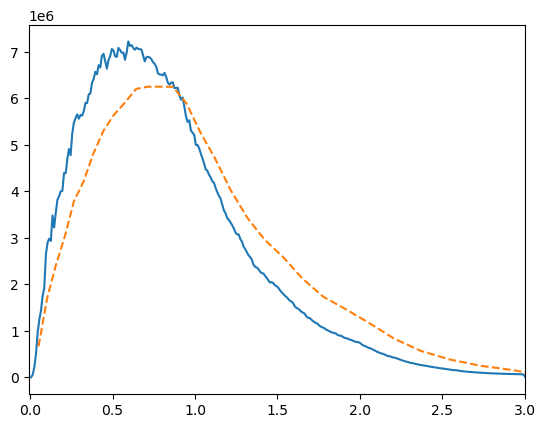

In [3]:
number_of_galaxies = 1e6
nofz_FS2_mean = np.loadtxt('nofz/nofz_FS2_mean.dat')
plt.plot(nofz_FS2_mean[:,0],nofz_FS2_mean[:,1]*number_of_galaxies*8,c='C'+str(0))
    
LensingMocks.compute_T17_Nz(z_persbin=[nofz_FS2_mean[:,0]-0.005], Nz_persbin=[nofz_FS2_mean[:,1]*number_of_galaxies])

print(np.sum(nofz_FS2_mean[:,1]*number_of_galaxies),np.sum(LensingMocks.N_T17_persbin[0]),np.sum(nofz_FS2_mean[:,1]*number_of_galaxies)/np.sum(LensingMocks.N_T17_persbin[0]))
plt.plot(LensingMocks.zbins[:,0],LensingMocks.N_T17_persbin[0],c='C'+str(1),linestyle='--')
    
plt.xlim(-0.01,3)

## Check if all files are available for the chosen line-of-sight (los) 

In [4]:
los = 0
LensingMocks.check_files(los=los)

All source files available
Density file T17_data/allskymap_nres12r000.delta_shell.dat available


## Prepare the galaxy postions using the density maps, which ensures we have source clustering

In [5]:
LensingMocks.create_gal_positions(los = los)

Reading density shells: 100%|██████████| 38/38 [01:39<00:00,  2.62s/it]


## Combine the single source maps using the postions determined above

In [6]:
LensingMocks.combine_source_planes(los = los)

Combining source planes: 100%|██████████| 38/38 [00:33<00:00,  1.13it/s]


## Create the final catalogues with columns: (ra, dec, kappa, gamma1, gamma2, eobs1, eobs2, weights)

In [7]:
epsilon_cov = np.array([[0.1,0.0],[0.0,0.1]])
epsilon_mean = np.array([0.0,0.0])

gamma_table = LensingMocks.create_sigma_shear_catalogue(los = 0, sbin = 0, epsilon_cov = epsilon_cov, epsilon_mean=epsilon_mean)

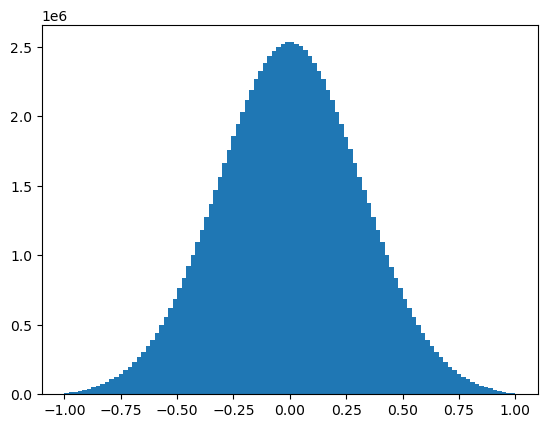

0.31097835

In [8]:
gamma_table

plt.hist(gamma_table['eobs1'],bins=100)
plt.show()

np.std(gamma_table['eobs1'])

## Compute the $\xi_\pm$ using treecorr to check if catalogues are properly created

In [9]:
 
cat1 = treecorr.Catalog(ra=gamma_table['ra'], dec=gamma_table['dec'], g1=gamma_table['gamma1'], g2=-gamma_table['gamma2'], w=gamma_table['weights'], ra_units='deg', dec_units='deg')

# Set up the correlation function
gg = treecorr.GGCorrelation(nbins=10, min_sep=1, max_sep=100, sep_units='arcmin')

# Process the catalogue to compute xi+ and xi-
gg.process(cat1)

# Output the results to a file
gg.write('outputs/xi_EUCLID.dat')


cat1 = treecorr.Catalog(ra=gamma_table['ra'], dec=gamma_table['dec'], g1=gamma_table['eobs1'], g2=-gamma_table['eobs2'], w=gamma_table['weights'], ra_units='deg', dec_units='deg')

# Set up the correlation function
gg = treecorr.GGCorrelation(nbins=10, min_sep=1, max_sep=100, sep_units='arcmin')

# Process the catalogue to compute xi+ and xi-
gg.process(cat1)

# Output the results to a file
gg.write('outputs/xi_noise_EUCLID.dat')




## Plot the $\xi_\pm$ for noisefree and noisy data

Exception ignored in: <function GField.__del__ at 0x136553160>
Traceback (most recent call last):
  File "/Users/pierreburger/opt/anaconda3/envs/DS_env/lib/python3.9/site-packages/treecorr/field.py", line 706, in __del__
    _lib.DestroyGField(self.data, self._coords)
KeyboardInterrupt: 


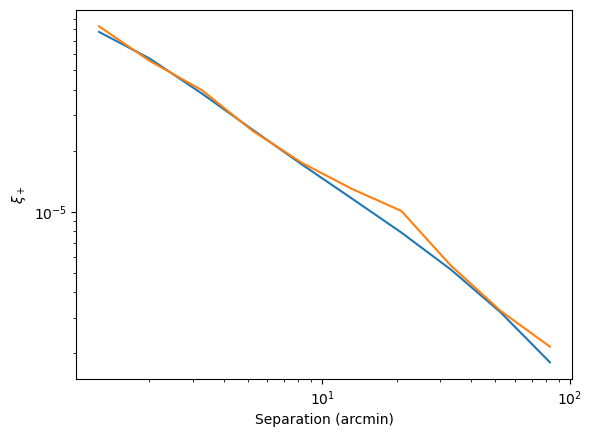

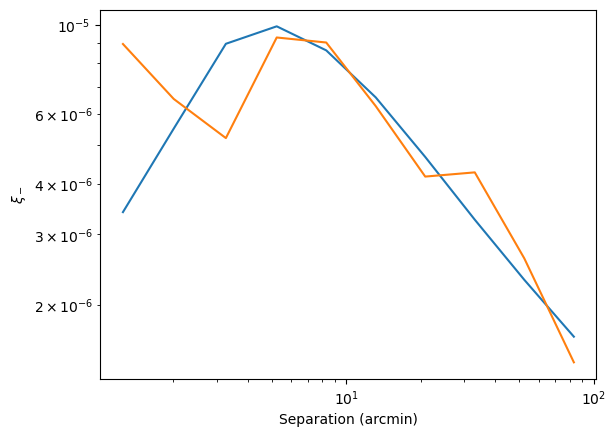

In [10]:

plt.figure()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
i=0
data = np.loadtxt('outputs/xi_EUCLID.dat')
plt.loglog(data[:,1],data[:,3], color='C0',label=f'noisefree')

data = np.loadtxt('outputs/xi_noise_EUCLID.dat')
plt.loglog(data[:,1],data[:,3], color='C1',label=f'noisy')

plt.xlabel('Separation (arcmin)')
plt.ylabel(r'$\xi_+$')
        
plt.show()     



plt.figure()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

data = np.loadtxt('outputs/xi_EUCLID.dat')
plt.loglog(data[:,1],data[:,4], color='C0',label=f'noisefree')

data = np.loadtxt('outputs/xi_noise_EUCLID.dat')
plt.loglog(data[:,1],data[:,4], color='C1',label=f'noisy')

plt.xlabel('Separation (arcmin)')
plt.ylabel(r'$\xi_-$')
        
plt.show()            



In [ ]:
nz